In [1]:
import numpy as np
from NeuralNet import *
from random import randint
from random import random
import math

training_set  = open("train-images.idx3-ubyte","r")
dt = np.dtype('>i4')
np.fromfile(training_set, dt, count=4)
dt = np.dtype('>u1')
images = np.fromfile(training_set, dt)
dim = 28
samples = 60000
print(len(images), dim*dim*samples)

numbers = images.reshape((samples, dim*dim))/256
# numbers = (numbers>0).astype(int)
np.savetxt('result.txt', numbers[99].reshape((dim,dim)), fmt='%d')

training_labels  = open("train-labels.idx1-ubyte","r")
dt = np.dtype('>i4')
labels = np.fromfile(training_labels, dt, count=2)
dt = np.dtype('>i1')
labels = np.fromfile(training_labels, dt)
label = np.zeros((samples, 10))
for i in range(0,samples):
    label[i,labels[i]] = 1

47040000 47040000


In [2]:
net = LayeredNet([28*28,10], "sigmoid")
# net.grow(100)
save = net.synapse
prev = 0
count = 0
succ = []
shuffled = np.random.permutation(np.arange(0,samples,10))
frac = 1 # how much of the set are we going to train on
for j in range(200):
    print(j, end='\r')
    for i in shuffled[0:round(samples*frac)]:
        save = net.synapse
        lab = np.array(np.matrix(label[i:i+10,:]))
        for j in range(1): # Do multiple steps of learning
            net.learn(numbers[i:i+10],lab)


C:\Users\CathalHarte\Documents\MachineLearning\NeuralNet.py:26: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [3]:
net.synapse = save
start = 0
end = 60000
lab = np.array(np.matrix(label[start:end,:]))
net.success_rate(numbers[start:end],lab)
print(net.success_probability)

print("Output vs True\n")
for i in range(5):
    print(np.round(net.layer[-1][i]), ":", lab[i])

C:\Users\CathalHarte\Documents\MachineLearning\NeuralNet.py:26: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


0.8551
Output vs True

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.] : [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.] : [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.] : [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.] : [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.] : [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


7840000 7840000


C:\Users\CathalHarte\Documents\MachineLearning\NeuralNet.py:22: RuntimeWarning: overflow encountered in exp
  


0.9442


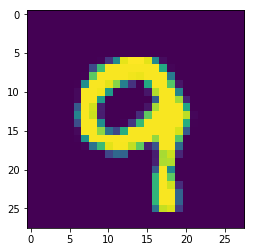

In [95]:
testing_set  = open("t10k-images.idx3-ubyte","r")
dt = np.dtype('>i4')
np.fromfile(testing_set, dt, count=4)
dt = np.dtype('>u1')
images = np.fromfile(testing_set, dt)
num_images = 10000
dim = 28
print(len(images), dim*dim*num_images)

test_numbers = images.reshape((num_images, dim*dim))
# test_numbers = (test_numbers>0).astype(int)
import matplotlib.pyplot as plt

testing_labels  = open("t10k-labels.idx1-ubyte","r")
dt = np.dtype('>i4')
labels = np.fromfile(testing_labels, dt, count=2)
dt = np.dtype('>i1')
labels = np.fromfile(testing_labels, dt)
test_label = np.zeros((num_images, 10))
for i in range(0,num_images):
    test_label[i,labels[i]] = 1

net.success_rate(test_numbers,test_label)
print(net.success_probability)
plt.imshow(test_numbers[99].reshape((28,28)))
plt.show()

In [ ]:
from pathlib import Path

num = 0
save = Path("synapses"+ str(num) + ".dat")
while save.is_file():
    num += 1
    save = Path("synapses"+ str(num) + ".dat")
open(save, 'w').close()
f=open(save,'ab')
f.truncate()
for syn in net.synapse:
    np.savetxt(f,syn, fmt='%f')
f.close()


In [ ]:
print(net.width)